<a href="https://colab.research.google.com/github/Rajesh2015/E-news-Express-Project/blob/main/E-news%20Express%20Project%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description
##Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]



##Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?


##Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - language chosen by the user to view the landing page


## **Import the necessary libraries**


In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

## **Loading the dataset**

In [4]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# root path for the sample data
path='/content/drive/MyDrive/Python Course'

In [6]:
# load the data in to panda dataframe
enews_df=pd.read_csv(f'{path}/abtest.csv')

In [7]:
# copying data to another variable to avoid any changes to original data
df = enews_df.copy()

## **Data Overview**

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data
- Check for missing values

In [8]:
# looking at head (5 observations)
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [9]:
# Shape of dataset
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows in dataset")

There are 6 columns and 100 rows in dataset


In [10]:
# Details about the dataset in terms of datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations:
Data set contain 6 columns:
* user_id  
* group
* landing_page
* time_spent_on_the_page
* converted
* language_preferred
---
Below is the table for overview:

| Column Name             | Data Type   |
|-------------------------|-------------|
| `user_id`               | int64       |
| `group`                 | object      |
| `landing_page`          | object      |
| `time_spent_on_the_page`| float64     |
| `converted`             | object      |
| `language_preferred`    | object      |


In [11]:
# Descriptive statistics  of given sample excluding object values
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


### Observations

The average time spent by the users on the page is 5.38 minutes. The minimum time spent is 0.19 minutes and the maximum time spent is 10.71 minutes. 50% of the people spent 5.415 or less than 5.415 minutes on a page. The time spent is a continuous variable.

In [12]:
# Descriptive statistics  of given sample excluding numerical values
df.describe(include='object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


In [13]:
# Print unque values in  catogorical fields converted,landing_page and group columns
print(f"Converted: {df['converted'].unique()}, Landing Page: {df['landing_page'].unique()}, Group: {df['group'].unique()}")

Converted: ['no' 'yes'], Landing Page: ['old' 'new'], Group: ['control' 'treatment']


### Observations
**Group**: The group has two unique values **control** and  **treatment**. Both values have an equal number of entries in the dataset.

**Landing Page**: The Landing page has two unique values **old** and **new** representing the old version of the landing page and the new version respectively.

**Converted**:The converted has two unique values **yes** and **no** .There is a slight more no of people getting converted to subscribers after viewing the landing page in this sample.

**Language Preferred**:Users prefer to read the page in 3 different languages and the most preferred one is **Spanish**.

---
- Unique values in catogorical fileds

| Column               | Unique Values               |
|----------------------|-----------------------------|
| `group`              | ['control', 'treatment']    |
| `landing_page`       | ['old', 'new']              |
| `converted`          | ['no', 'yes']               |
| `language_preferred` | ['Spanish', 'English', 'French'] |



In [14]:
# Check for missing data
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


###Observations
There is no null values in sample data set.

In [15]:
# Printing the duplicated rows
print(f"Number of duplicate rows: {df.shape[0] - df.drop_duplicates().shape[0]}")

Number of duplicate rows: 0


### Observations
There is no duplicated rows

### Univarite Analysis

### Utils

In [99]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()

    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='#FFCCCC')
    hist.axvline(mean_value, color='r', linestyle=':', label='Mean')
    hist.axvline(q25, color='g', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='b', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='m', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='#FFCCCC')
    box.axvline(mean_value, color='r', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='g', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='b', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='m', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


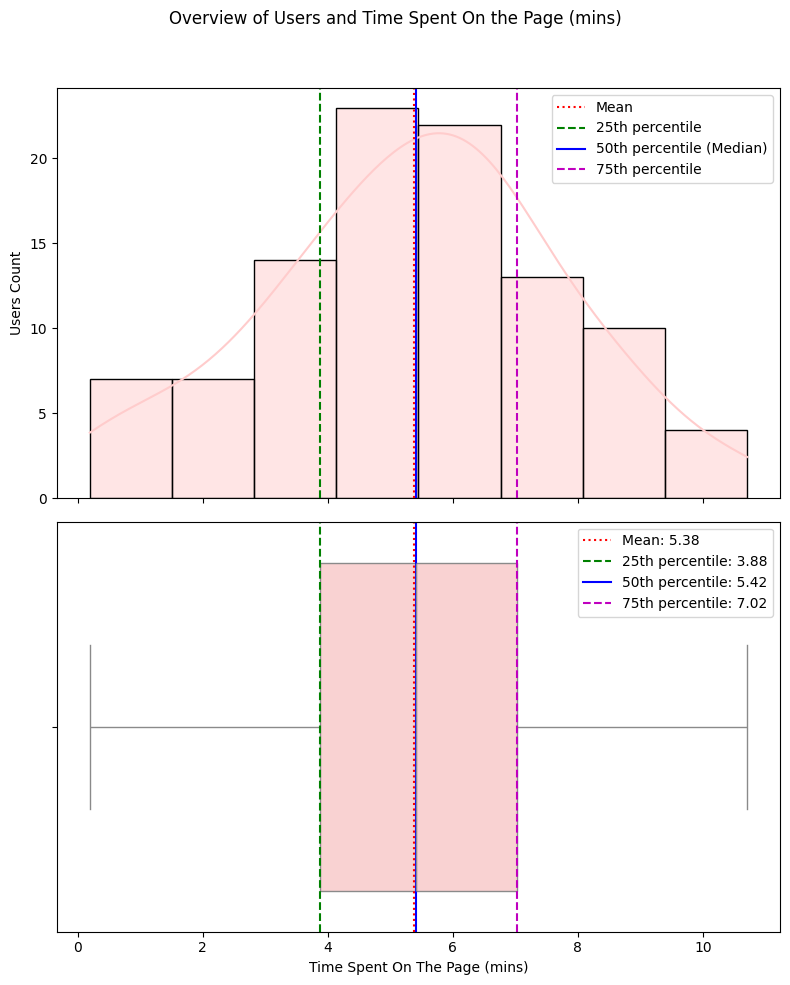

In [98]:
# plotting on time spent on the page with box plot and histogram
plot_histogram_and_boxplot(df, column='time_spent_on_the_page', xlabel='Time Spent On The Page (mins)',ylabel="Users Count",title="Overview of Users and Time Spent On the Page (mins)")

### Observations:
- Time spent on page follows a normal distribution
- Avg time on the page is around 5.38 mins
- Below is the 5 number summary

| **Statistic**          | **Value**  |
|------------------------|------------|
| **Min Time Spent**      | 0.19       |
| **Mean**                | 5.38       |
| **25th Percentile**     | 3.88       |
| **50th Percentile**     | 5.42       |
| **75th Percentile**     | 7.02       |
| **Max Time Spent**      | 10.71      |
